In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.svm import SVC
import seaborn as sns; sns.set(style="ticks", color_codes=True)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'sex_encoded'], dtype='object')
          sex_encoded
Survived             
0            0.852459
1            0.318713


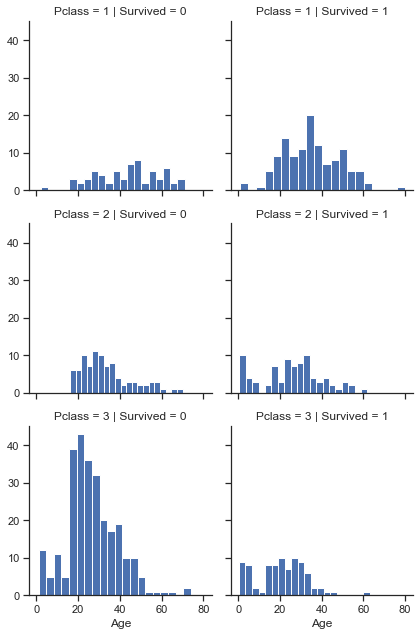

In [153]:
train = pd.read_csv('Desktop/datasets/Titanic_dataset/train.csv')
test = pd.read_csv('Desktop/datasets/Titanic_dataset/test.csv')

#Dropping unimportant columns

train = train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
X_test = test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
train.columns


#Exploring Corrleation between surviving-pclass and age

g = sns.FacetGrid(train,col = 'Survived',row='Pclass')
g.map(plt.hist,'Age',bins=20)

#Encoding Sex and Embarked columns

train['sex_encoded'] = train['Sex'].apply(lambda sex: 1 if sex == 'male' else 0)
X_test['sex_encoded'] = X_test['Sex'].apply(lambda sex: 1 if sex == 'male' else 0)
train = train.drop(['Sex'],axis=1) 
X_test = X_test.drop(['Sex'],axis=1)
print(X_test.columns)
print(train[['Survived','sex_encoded']].groupby('Survived').mean())

for i in range(len(train)):
    if train.iloc[i,6] == 'Q':
        train.iloc[i,6] = 1
    elif train.iloc[i,6] == 'S':
        train.iloc[i,6] = 2
    else:
        train.iloc[i,6] = 3
        
for i in range(len(test)):
    if X_test.iloc[i,5] == 'Q':
        X_test.iloc[i,5] = 1
    elif X_test.iloc[i,5] == 'S':
        X_test.iloc[i,5] = 2
    else:
        X_test.iloc[i,5] = 3

In [154]:
#Splitting features and output

y_train = train['Survived']
X_train = train.drop('Survived',axis=1)

#fill nan values by the mean of each category from the 6 categories that will make more accurate filling


print(X_train[['sex_encoded','Age','Pclass']].groupby(['sex_encoded','Pclass']).mean())

for i in range(len(X_train)):
    if (X_train.iloc[i,6] == 1) and (X_train.iloc[i,0] == 1):
        X_train.iloc[i,1] = 41.281386
    elif X_train.iloc[i,6] == 1 and X_train.iloc[i,0] == 2:
        X_train.iloc[i,1] = 30.740707
    elif X_train.iloc[i,6] == 1 and X_train.iloc[i,0] == 3:
        X_train.iloc[i,1] = 26.507589
    elif X_train.iloc[i,6] == 0 and X_train.iloc[i,0] == 1:
        X_train.iloc[i,1] = 34.611765
    elif X_train.iloc[i,6] == 0 and X_train.iloc[i,0] == 2:
        X_train.iloc[i,1] = 28.722973
    elif X_train.iloc[i,6] == 0 and X_train.iloc[i,0] == 3:
        X_train.iloc[i,1] = 21.750000

print(X_test[['sex_encoded','Age','Pclass']].groupby(['sex_encoded','Pclass']).mean())

for i in range(len(X_test)):
    if X_test.iloc[i,6] == 1 and X_test.iloc[i,0] == 1:
        X_test.iloc[i,1] = 40.520000
    elif X_test.iloc[i,6] == 1 and X_test.iloc[i,0] == 2:
        X_test.iloc[i,1] = 30.940678
    elif X_test.iloc[i,6] == 1 and X_test.iloc[i,0] == 3:
        X_test.iloc[i,1] = 24.525104
    elif X_test.iloc[i,6] == 0 and X_test.iloc[i,0] == 1:
        X_test.iloc[i,1] = 41.333333
    elif X_test.iloc[i,6] == 0 and X_test.iloc[i,0] == 2:
        X_test.iloc[i,1] = 24.376552
    elif X_test.iloc[i,6] == 0 and X_test.iloc[i,0] == 3:
        X_test.iloc[i,1] = 23.073400
X_test['Fare'].fillna(X_test['Fare'].mean(),inplace=True)


                          Age
sex_encoded Pclass           
0           1       34.611765
            2       28.722973
            3       21.750000
1           1       41.281386
            2       30.740707
            3       26.507589
                          Age
sex_encoded Pclass           
0           1       41.333333
            2       24.376552
            3       23.073400
1           1       40.520000
            2       30.940678
            3       24.525104


In [168]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
model2 = neighbors.KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
model3 = SVC()
model3.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

#Logistic regrssion has the highest accuracy

submission = pd.Series(y_pred1,index=np.arange(892,892+len(y_pred1),1))
submission2 = pd.Series(y_pred2,index=np.arange(892,892+len(y_pred2),1))
submission3 = pd.Series(y_pred3,index=np.arange(892,892+len(y_pred2),1))

submission1.to_csv('Desktop/submission1.csv')
submission2.to_csv('Desktop/submission2.csv')
submission3.to_csv('Desktop/submission3.csv')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
